In [ ]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import matplotlib.pyplot as plt
from pyUn0 import make_clean
# Check the version
USB.__version__
# init FTDI device

'0.2.7'

In [ ]:
make_clean()

In [2]:
fpga = USB.FpgaControl('ftdi://ftdi:2232:/', spi_freq=8E6)
# reload configuration (optional step - just to fill BRAM (DACGAIN registers) with initial values)
fpga.reload()
# reset fpga
fpga.reset()
fpga.set_pulseform(initDelay=5, POn=16, PInter=8, Poff=5)
gain = [int(200 + ((1000-100)*x*x*x/32/32/32)) for x in range(32)]
acq_res = fpga.do_acquisition(acq_lines=1, gain=gain, double_rate=True) 

There are 1 lines.


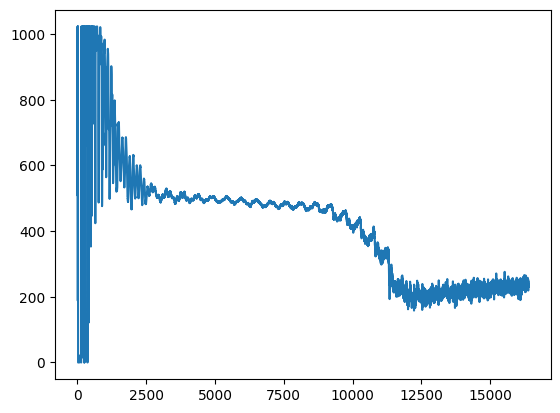

In [3]:
print("There are",len(acq_res),"lines.")
LineOne = acq_res[0]
plt.plot(LineOne)

fpga.save("50%_25_1") 
plot = USB.FView() 
#plot.readfile('16cm_0.5MHz.npz')